In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
tf.__version__

'2.18.0'

### Dataset


In [3]:
housing = pd.read_csv("Housing.csv")

In [21]:
print(housing.info()) 
print(housing.describe())
housing.shape 
housing.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   price/sqft     21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  building_age   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  lat   

,date,price,bedrooms,bathrooms,price/sqft,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,building_age,zipcode,sqft_living15,sqft_lot15,lat,long
0,141013,221900,3,1.00,188.050848,1180,5650,0,0,3,7,1180,0,1955,69,98178,1340,5650,47.5112,-122.257
1,141209,538000,3,2.25,209.338521,2570,7242,0,0,3,7,2170,400,1951,73,98125,1690,7639,47.7210,-122.319
2,150225,180000,2,1.00,233.766234,770,10000,0,0,3,6,770,0,1933,91,98028,2720,8062,47.7379,-122.233
3,141209,604000,4,3.00,308.163265,1960,5000,0,0,5,7,1050,910,1965,59,98136,1360,5000,47.5208,-122.393


In [26]:
print(housing.columns)


Index(['date ', 'price', 'bedrooms', 'bathrooms', 'price/sqft', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'building_age', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'lat', 'long'],
      dtype='object')


In [ ]:
drop_columns = ['price', 'date', 'zipcode']
X = housing.drop(columns=[col for col in drop_columns if col in housing.columns]).values
Y = housing['price'].values
#print(Y)
#print(X)

[221900 538000 180000 ... 402101 400000 325000]
[[ 1.41013e+05  3.00000e+00  1.00000e+00 ...  5.65000e+03  4.75112e+01
  -1.22257e+02]
 [ 1.41209e+05  3.00000e+00  2.25000e+00 ...  7.63900e+03  4.77210e+01
  -1.22319e+02]
 [ 1.50225e+05  2.00000e+00  1.00000e+00 ...  8.06200e+03  4.77379e+01
  -1.22233e+02]
 ...
 [ 1.40623e+05  2.00000e+00  7.50000e-01 ...  2.00700e+03  4.75944e+01
  -1.22299e+02]
 [ 1.50116e+05  3.00000e+00  2.50000e+00 ...  1.28700e+03  4.75345e+01
  -1.22069e+02]
 [ 1.41015e+05  2.00000e+00  7.50000e-01 ...  1.35700e+03  4.75941e+01
  -1.22299e+02]]


In [ ]:
#X = housing.iloc['price'].values #for the dependant variables
#Y = housing.iloc[:, 1].values #for the price variable
#print(Y)
#print(X)

KeyError: "['date'] not found in axis"

Training Set & Test Set

In [29]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

Feature Scaling

In [30]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

### Building the ANN


Initializing the ANN


In [31]:
ann = tf.keras.models.Sequential()

input layer & first hiddel layer


In [34]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu',  input_dim=X_train.shape[1]))

c:\Users\shagh\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2nd hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1))

### Training the model

Compiling the model

In [37]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Training the ANN on the Training set


In [38]:
ann.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 385639874560.0000 - mean_squared_error: 385639874560.0000
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 42894860288.0000 - mean_squared_error: 42894860288.0000
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29173559296.0000 - mean_squared_error: 29173559296.0000
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17831430144.0000 - mean_squared_error: 17831430144.0000
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14888911872.0000 - mean_squared_error: 14888911872.0000
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14287286272.0000 - mean_squared_error: 14287286272.0000
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12170977280.0000 - mean_squared_error: 12170977280.0000
Epoch 8/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11334193152.0000 - mean_squared_error: 11334193152.0000
Epoch 9/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1

Prediction & Testing


In [40]:
Y_pred = ann.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
print(f"Mean Square Error: {mse}")
#print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))
#if Y pred is between 0 and 0.5, then this new Y pred will become 0 because this won’t be true.

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Square Error: 5173093657.678151


Making the Confusion Matrix

In [41]:
print(housing['price'].describe())


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [ ]:
from math import sqrt
rmse = sqrt(5173093657.678151) #Root MSE: to bring back to the same unit as price $
print(f"Root Mean Square Error: {rmse}")


Root Mean Square Error: 71924.22163414875


R^2: to get a better sense of how much variance in the target variable is explained by the model

In [64]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print(f"R² (R-squared): {r2}")

R² (R-squared): 0.9565009474754333


### Visual Analyzing

In [54]:
history = ann.fit(X_train, Y_train, batch_size=32, epochs=100)


Epoch 1/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5496073216.0000 - mean_squared_error: 5496073216.0000
Epoch 2/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5423180800.0000 - mean_squared_error: 5423180800.0000
Epoch 3/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6019469312.0000 - mean_squared_error: 6019469312.0000
Epoch 4/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5559583232.0000 - mean_squared_error: 5559583232.0000
Epoch 5/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5080071168.0000 - mean_squared_error: 5080071168.0000
Epoch 6/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5419773440.0000 - mean_squared_error: 5419773440.0000
Epoch 7/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5511236096.0000 - mean_squared_error: 5511236096.0000
Epoch 8/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5101896704.0000 - mean_squared_error: 5101896704.0000
Epoch 9/100
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4822675968.0000 - m

KeyboardInterrupt: 

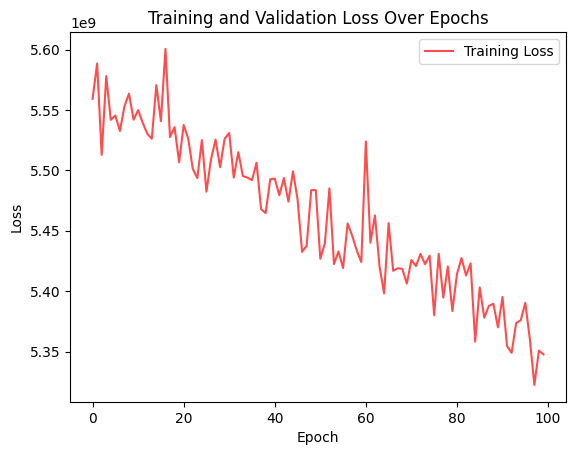

In [65]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['loss'], color='red', label='Training Loss', alpha=0.7)

if 'val_loss' in history.history:
    ax.plot(history.epoch, history.history['val_loss'], color='blue', label='Validation Loss', alpha=0.7)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss Over Epochs')
ax.legend()
plt.show()


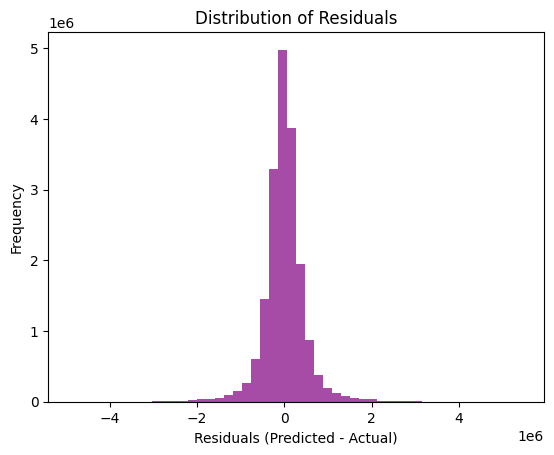

In [61]:
# histogram of residuals 
residuals = Y_test - Y_pred
residuals = np.ravel(residuals)

plt.hist(residuals, bins=50, color='purple', alpha=0.7)  # Single color for all residuals
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()



Compare predicted prices against actual prices


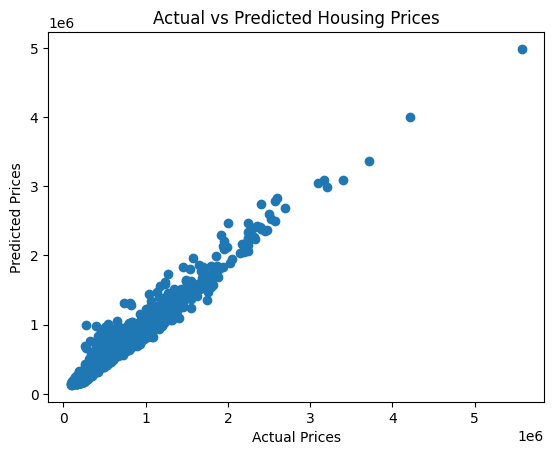

In [56]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


#### Some Testings

In [73]:
ann.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,507 (80.11 KB)

 Trainable params: 6,835 (26.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,672 (53.41 KB)

In [75]:
# Check the model's input shape
print(ann.input_shape)



(None, 18)


In [78]:
Testcase1 = np.array([[3000, 3, 2, 0, 1, 1, 0, 8, 9, 1000, 2, 0, 2010, 0, 1, 1, 0, 0]], dtype=np.float32) 

# Predict price 
predicted_price = ann.predict(Testcase1)

print(f"Predicted price for this test case house: ${predicted_price[0][0]:,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted price for this test case house: $1,227,105,280.00
